In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env
import warnings
warnings.filterwarnings("ignore")
import os
import re
import wrangle


In [2]:
df = wrangle.get_logs()

In [3]:
# set date column as datetime dtype
df.date = pd.to_datetime(df.date)
df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)
df = df.set_index(df.date)

In [4]:
#make a pages column
df['pages_one_user'] = df['endpoint'].resample('d').count()
df.head(10)

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,pages_one_user
date,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533
2018-01-26,2018-01-26,09:56:41,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533
2018-01-26,2018-01-26,09:56:46,javascript-i/conditionals,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533
2018-01-26,2018-01-26,09:56:48,javascript-i/functions,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533
2018-01-26,2018-01-26,09:56:59,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533


In [5]:
# split path into 4 pages
df= pd.concat([df, df.endpoint.str.split('/',3, expand = True)], axis=1)
df.head(10)

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,pages_one_user,0,1,2,3
date,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,,,None,None
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,java-ii,None,None,None
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,java-ii,object-oriented-programming,None,None
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,slides,object_oriented_programming,None,None
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533,javascript-i,conditionals,None,None
2018-01-26,2018-01-26,09:56:41,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533,javascript-i,loops,None,None
2018-01-26,2018-01-26,09:56:46,javascript-i/conditionals,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533,javascript-i,conditionals,None,None
2018-01-26,2018-01-26,09:56:48,javascript-i/functions,3,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533,javascript-i,functions,None,None
2018-01-26,2018-01-26,09:56:59,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533,javascript-i,loops,None,None


In [6]:
# rename pages
df.rename(columns={0:'page_1',1:'page_2',2:'page_3',3:'page_4'}, inplace = True)
df.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,pages_one_user,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,,,None,None
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,java-ii,None,None,None
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,java-ii,object-oriented-programming,None,None
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,slides,object_oriented_programming,None,None
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,533,javascript-i,conditionals,None,None


In [7]:
#check if any staff and in web dev
wd_df= df[(df['program_id'] == 1) & (df['cohort_name'] == 'Staff')]
wd_df.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,pages_one_user,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,,


In [8]:
#checking if any one is staff and in data science
ds_df= df[(df['program_id'] == 3) & (df['cohort_name'] == 'Staff')]
ds_df.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,pages_one_user,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,,


In [9]:
# web dev and DS with activity after end date into own df wit
web_dev = df[(df['program_id'] != 3) & (df['cohort_name'] != 'Staff') & (df.index > df.end_date)]
DS = df[(df['program_id'] == 3) & (df.index > df.end_date)]
DS.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,pages_one_user,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,,
2020-01-31,2020-01-31,11:05:04,/,476,136.50.49.145,Bayes,2019-08-19,2020-01-30,3,840,,,None,None
2020-01-31,2020-01-31,11:05:13,1-fundamentals/1.1-intro-to-data-science,476,136.50.49.145,Bayes,2019-08-19,2020-01-30,3,840,1-fundamentals,1.1-intro-to-data-science,None,None
2020-01-31,2020-01-31,11:05:13,1-fundamentals/modern-data-scientist.jpg,476,136.50.49.145,Bayes,2019-08-19,2020-01-30,3,840,1-fundamentals,modern-data-scientist.jpg,None,None
2020-01-31,2020-01-31,11:05:13,1-fundamentals/AI-ML-DL-timeline.jpg,476,136.50.49.145,Bayes,2019-08-19,2020-01-30,3,840,1-fundamentals,AI-ML-DL-timeline.jpg,None,None
2020-01-31,2020-01-31,14:44:59,/,476,136.50.49.145,Bayes,2019-08-19,2020-01-30,3,840,,,None,None


In [10]:
web_dev.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,pages_one_user,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,,,None,None
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,java-ii,None,None,None
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,java-ii,object-oriented-programming,None,None
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,533,slides,object_oriented_programming,None,None
2018-01-26,2018-01-26,10:14:47,/,11,97.105.19.61,Arches,2014-02-04,2014-04-22,1,533,,,None,None


### What topics are grads continuing to reference after graduation and into their jobs (for each program)?

<AxesSubplot:ylabel='endpoint'>

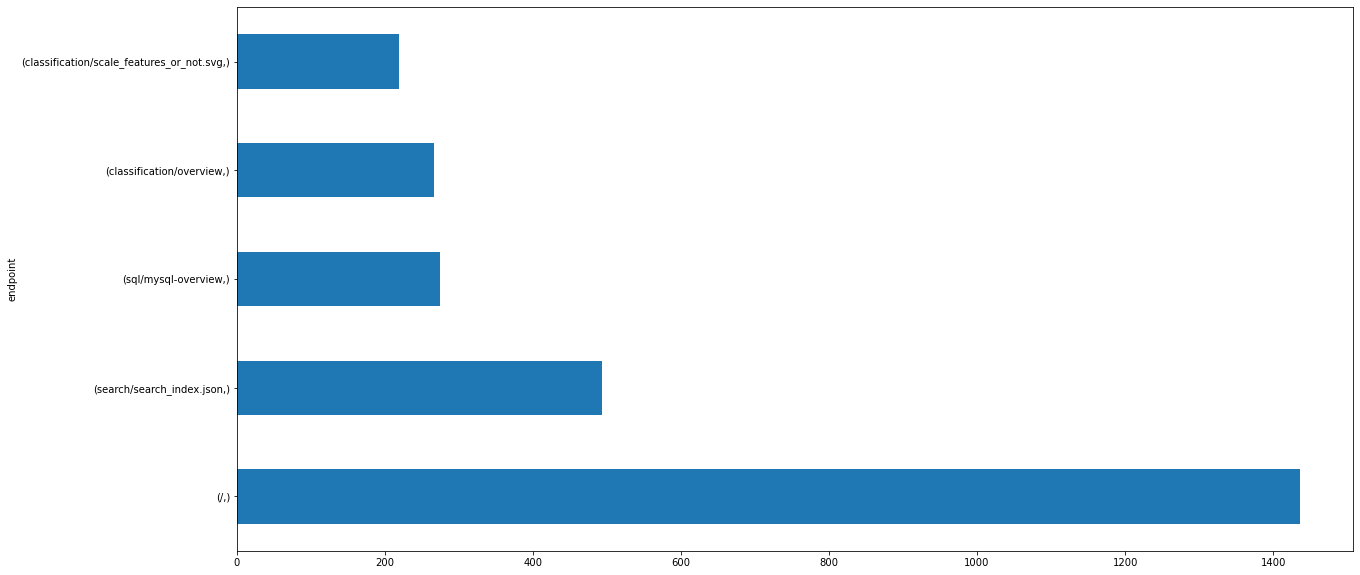

In [11]:
# for DS cohort
plt.figure(figsize=(20,10))
DS[['endpoint']].value_counts().head().plot(kind='barh')

<AxesSubplot:ylabel='endpoint'>

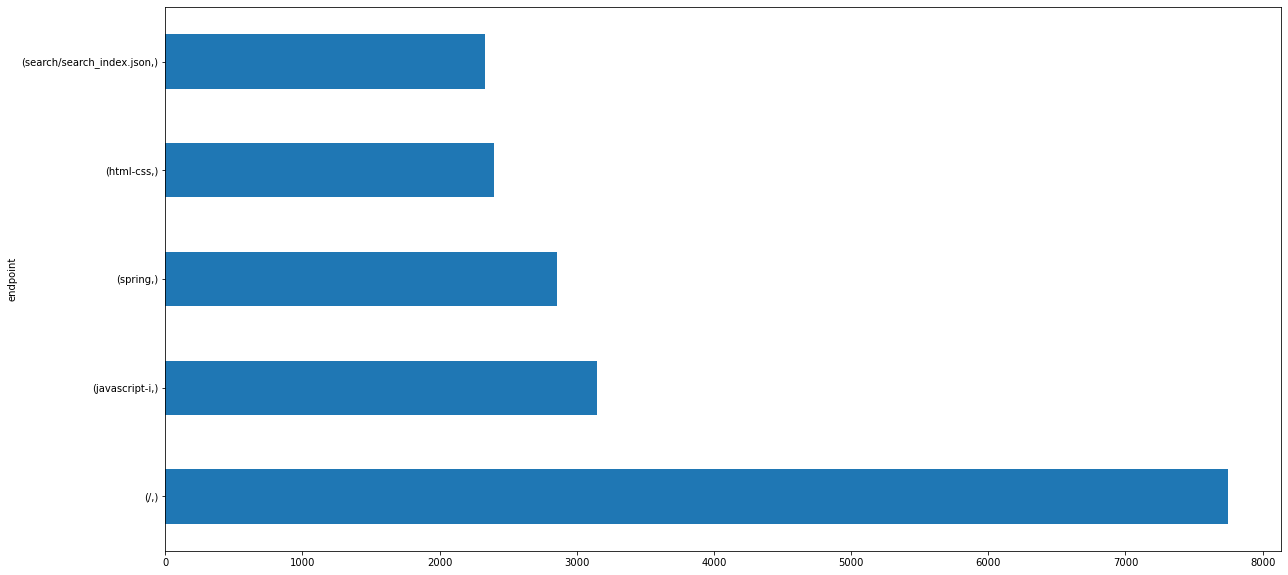

In [12]:
plt.figure(figsize=(20,10))
web_dev[['endpoint']].value_counts().head().plot(kind='barh')